In [68]:
import os
from os.path import join, exists
import shutil
import time

import geojson
import matplotlib.pyplot as plt
from tqdm import tqdm

from greedyfhist.registration import GreedyFHist
from greedyfhist.options import Options
from greedyfhist.utils.io import read_sitk_if_not_none
from greedyfhist.utils.geojson_utils import read_geojson, geojson_2_table


In [3]:
src_img_dir = '/mnt/scratch/maximilw/data/section6_reg/ome_export/'
src_ann_dir = '/mnt/scratch/maximilw/data/section6_reg/annotations/'
dst_ann_dir = '/mnt/scratch/maximilw/data/section6_reg/annotations_out/'
if not exists(dst_ann_dir):
    os.mkdir(dst_ann_dir)

In [9]:
def get_corenames(path):
    cores = []
    for fname in os.listdir(path):
        core_id = fname.rsplit('_', maxsplit=1)[0]
        cores.append(core_id)
    return list(set(cores))

core_names = get_corenames(src_img_dir)

In [10]:
core_name = core_names[0]
core_name

'002_01'

In [26]:
def find_annotation_file(dir_, core_name):
    slide_id, pos_id = core_name.split('_')
    g_files = os.listdir(dir_)
    g_files = [x.rsplit('.', maxsplit=1)[0] for x in g_files]
    g_file = [x for x in g_files if x.startswith(slide_id) and x.endswith(pos_id)][0]
    path = f'{dir_}/{g_file}.geojson'
    return path

In [70]:
for core_name in tqdm(core_names):
    if core_name == '046_01':
        continue
    # print(idx, core_name)
    mov_img_path = f'{src_img_dir}/{core_name}_07.ome.tif'
    fix_img_path = f'{src_img_dir}/{core_name}_06.ome.tif'
    mov_ann_path = find_annotation_file(src_ann_dir, core_name)
    options = Options()
    options.greedy_opts.n_threads = 32
    options.greedy_opts.s1 = 2
    options.greedy_opts.s2 = 1
    output_dir = 'save_directories/temp_nb/'
    temp_dir = 'save_directories/temp_nb/temp'
    if exists(output_dir):
        shutil.rmtree(output_dir)
        os.mkdir(output_dir)
    options.output_directory = output_dir
    options.temporary_directory = temp_dir   
    options.pre_downsampling_factor = 8
    mov_img = read_sitk_if_not_none(mov_img_path)
    mov_img = mov_img[:, :, :3]

    fix_img = read_sitk_if_not_none(fix_img_path)
    fix_img = fix_img[:, :, :3]
    mov_ann = read_geojson(mov_ann_path)
    registerer = GreedyFHist.load_from_config({'path_to_greedy':'/mnt/work/workbench/maximilw/applications/test/greedy/build2/'})
    # start = time.time()
    registration_result = registerer.register(moving_img=mov_img,
                                              fixed_img=fix_img,
                                              options=options)
    # end = time.time()
    # print(end - start)
    geojson_warp_result = registerer.transform_geojson(mov_ann, registration_result, {'tmp_dir': options.temporary_directory})
    warped_geojson = geojson_warp_result.final_transform.transformed_geojson
    out_path = join(dst_ann_dir, f'{core_name}.geojson')
    with open(out_path, 'w') as f:
        geojson.dump(warped_geojson, f)        

  0%|          | 0/20 [00:00<?, ?it/s]

Loading /mnt/work/workbench/maximilw/applications/GreedyFHist/greedyfhist/model_data/segmentation/default_yolo.onnx for ONNX Runtime inference...

0: 640x640 1 tissue, 139.4ms
Speed: 6.7ms preprocess, 139.4ms inference, 38.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 tissue, 175.4ms
Speed: 14.3ms preprocess, 175.4ms inference, 37.3ms postprocess per image at shape (1, 3, 640, 640)


  5%|▌         | 1/20 [01:06<21:10, 66.87s/it]

Loading /mnt/work/workbench/maximilw/applications/GreedyFHist/greedyfhist/model_data/segmentation/default_yolo.onnx for ONNX Runtime inference...

0: 640x640 1 tissue, 160.5ms
Speed: 16.1ms preprocess, 160.5ms inference, 36.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 tissues, 78.2ms
Speed: 10.4ms preprocess, 78.2ms inference, 308.1ms postprocess per image at shape (1, 3, 640, 640)


 10%|█         | 2/20 [02:13<20:02, 66.78s/it]

Loading /mnt/work/workbench/maximilw/applications/GreedyFHist/greedyfhist/model_data/segmentation/default_yolo.onnx for ONNX Runtime inference...

0: 640x640 1 tissue, 87.7ms
Speed: 14.3ms preprocess, 87.7ms inference, 47.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 tissue, 186.8ms
Speed: 15.7ms preprocess, 186.8ms inference, 28.3ms postprocess per image at shape (1, 3, 640, 640)


 15%|█▌        | 3/20 [03:14<18:12, 64.26s/it]

Loading /mnt/work/workbench/maximilw/applications/GreedyFHist/greedyfhist/model_data/segmentation/default_yolo.onnx for ONNX Runtime inference...

0: 640x640 1 tissue, 131.4ms
Speed: 14.7ms preprocess, 131.4ms inference, 14.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 tissue, 98.5ms
Speed: 4.9ms preprocess, 98.5ms inference, 36.2ms postprocess per image at shape (1, 3, 640, 640)


 20%|██        | 4/20 [04:16<16:53, 63.35s/it]

Loading /mnt/work/workbench/maximilw/applications/GreedyFHist/greedyfhist/model_data/segmentation/default_yolo.onnx for ONNX Runtime inference...

0: 640x640 1 tissue, 84.0ms
Speed: 12.4ms preprocess, 84.0ms inference, 39.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 tissues, 148.2ms
Speed: 11.9ms preprocess, 148.2ms inference, 54.0ms postprocess per image at shape (1, 3, 640, 640)


 25%|██▌       | 5/20 [05:18<15:43, 62.93s/it]

Loading /mnt/work/workbench/maximilw/applications/GreedyFHist/greedyfhist/model_data/segmentation/default_yolo.onnx for ONNX Runtime inference...

0: 640x640 1 tissue, 171.9ms
Speed: 12.9ms preprocess, 171.9ms inference, 34.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 tissue, 115.4ms
Speed: 12.2ms preprocess, 115.4ms inference, 34.6ms postprocess per image at shape (1, 3, 640, 640)


 30%|███       | 6/20 [06:19<14:30, 62.20s/it]

Loading /mnt/work/workbench/maximilw/applications/GreedyFHist/greedyfhist/model_data/segmentation/default_yolo.onnx for ONNX Runtime inference...

0: 640x640 1 tissue, 300.1ms
Speed: 15.7ms preprocess, 300.1ms inference, 31.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 tissue, 158.3ms
Speed: 13.2ms preprocess, 158.3ms inference, 37.4ms postprocess per image at shape (1, 3, 640, 640)


 35%|███▌      | 7/20 [07:12<12:47, 59.07s/it]

Loading /mnt/work/workbench/maximilw/applications/GreedyFHist/greedyfhist/model_data/segmentation/default_yolo.onnx for ONNX Runtime inference...

0: 640x640 1 tissue, 111.7ms
Speed: 11.5ms preprocess, 111.7ms inference, 38.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 tissue, 78.9ms
Speed: 10.2ms preprocess, 78.9ms inference, 34.6ms postprocess per image at shape (1, 3, 640, 640)


 40%|████      | 8/20 [08:15<12:05, 60.45s/it]

Loading /mnt/work/workbench/maximilw/applications/GreedyFHist/greedyfhist/model_data/segmentation/default_yolo.onnx for ONNX Runtime inference...

0: 640x640 1 tissue, 192.8ms
Speed: 12.5ms preprocess, 192.8ms inference, 26.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 tissue, 173.6ms
Speed: 10.1ms preprocess, 173.6ms inference, 35.6ms postprocess per image at shape (1, 3, 640, 640)


 45%|████▌     | 9/20 [09:15<11:01, 60.10s/it]

Loading /mnt/work/workbench/maximilw/applications/GreedyFHist/greedyfhist/model_data/segmentation/default_yolo.onnx for ONNX Runtime inference...

0: 640x640 1 tissue, 143.9ms
Speed: 13.3ms preprocess, 143.9ms inference, 40.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 tissue, 101.9ms
Speed: 11.6ms preprocess, 101.9ms inference, 34.3ms postprocess per image at shape (1, 3, 640, 640)


 50%|█████     | 10/20 [10:13<09:56, 59.63s/it]

Loading /mnt/work/workbench/maximilw/applications/GreedyFHist/greedyfhist/model_data/segmentation/default_yolo.onnx for ONNX Runtime inference...

0: 640x640 1 tissue, 167.5ms
Speed: 18.7ms preprocess, 167.5ms inference, 29.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 tissue, 146.5ms
Speed: 11.0ms preprocess, 146.5ms inference, 33.5ms postprocess per image at shape (1, 3, 640, 640)


 55%|█████▌    | 11/20 [11:08<08:44, 58.30s/it]

Loading /mnt/work/workbench/maximilw/applications/GreedyFHist/greedyfhist/model_data/segmentation/default_yolo.onnx for ONNX Runtime inference...

0: 640x640 1 tissue, 95.1ms
Speed: 12.7ms preprocess, 95.1ms inference, 33.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 tissue, 116.0ms
Speed: 12.1ms preprocess, 116.0ms inference, 37.8ms postprocess per image at shape (1, 3, 640, 640)


 65%|██████▌   | 13/20 [12:06<05:10, 44.41s/it]

Loading /mnt/work/workbench/maximilw/applications/GreedyFHist/greedyfhist/model_data/segmentation/default_yolo.onnx for ONNX Runtime inference...

0: 640x640 1 tissue, 80.3ms
Speed: 12.7ms preprocess, 80.3ms inference, 34.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 tissue, 108.7ms
Speed: 11.6ms preprocess, 108.7ms inference, 32.1ms postprocess per image at shape (1, 3, 640, 640)


 70%|███████   | 14/20 [13:03<04:45, 47.62s/it]

Loading /mnt/work/workbench/maximilw/applications/GreedyFHist/greedyfhist/model_data/segmentation/default_yolo.onnx for ONNX Runtime inference...

0: 640x640 1 tissue, 86.2ms
Speed: 12.2ms preprocess, 86.2ms inference, 36.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 tissue, 86.9ms
Speed: 10.2ms preprocess, 86.9ms inference, 42.3ms postprocess per image at shape (1, 3, 640, 640)


 75%|███████▌  | 15/20 [13:59<04:09, 49.95s/it]

Loading /mnt/work/workbench/maximilw/applications/GreedyFHist/greedyfhist/model_data/segmentation/default_yolo.onnx for ONNX Runtime inference...

0: 640x640 1 tissue, 90.3ms
Speed: 12.5ms preprocess, 90.3ms inference, 30.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 tissue, 85.6ms
Speed: 12.6ms preprocess, 85.6ms inference, 35.4ms postprocess per image at shape (1, 3, 640, 640)


 80%|████████  | 16/20 [15:01<03:32, 53.07s/it]

Loading /mnt/work/workbench/maximilw/applications/GreedyFHist/greedyfhist/model_data/segmentation/default_yolo.onnx for ONNX Runtime inference...

0: 640x640 1 tissue, 72.8ms
Speed: 10.3ms preprocess, 72.8ms inference, 35.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 tissue, 72.4ms
Speed: 5.2ms preprocess, 72.4ms inference, 13.9ms postprocess per image at shape (1, 3, 640, 640)


 85%|████████▌ | 17/20 [15:59<02:43, 54.63s/it]

Loading /mnt/work/workbench/maximilw/applications/GreedyFHist/greedyfhist/model_data/segmentation/default_yolo.onnx for ONNX Runtime inference...

0: 640x640 1 tissue, 75.9ms
Speed: 9.6ms preprocess, 75.9ms inference, 14.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 tissue, 98.8ms
Speed: 13.2ms preprocess, 98.8ms inference, 13.8ms postprocess per image at shape (1, 3, 640, 640)


 90%|█████████ | 18/20 [16:59<01:52, 56.18s/it]

Loading /mnt/work/workbench/maximilw/applications/GreedyFHist/greedyfhist/model_data/segmentation/default_yolo.onnx for ONNX Runtime inference...

0: 640x640 1 tissue, 69.1ms
Speed: 9.5ms preprocess, 69.1ms inference, 14.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 tissue, 72.3ms
Speed: 5.2ms preprocess, 72.3ms inference, 13.8ms postprocess per image at shape (1, 3, 640, 640)


 95%|█████████▌| 19/20 [18:01<00:57, 57.91s/it]

Loading /mnt/work/workbench/maximilw/applications/GreedyFHist/greedyfhist/model_data/segmentation/default_yolo.onnx for ONNX Runtime inference...

0: 640x640 1 tissue, 80.1ms
Speed: 12.7ms preprocess, 80.1ms inference, 15.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 tissue, 68.2ms
Speed: 6.4ms preprocess, 68.2ms inference, 10.0ms postprocess per image at shape (1, 3, 640, 640)


100%|██████████| 20/20 [19:00<00:00, 57.05s/it]


In [71]:
13

13

Loading /mnt/work/workbench/maximilw/applications/GreedyFHist/greedyfhist/model_data/segmentation/default_yolo.onnx for ONNX Runtime inference...

0: 640x640 1 tissue, 81.1ms
Speed: 13.9ms preprocess, 81.1ms inference, 23.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 tissue, 132.3ms
Speed: 10.3ms preprocess, 132.3ms inference, 27.0ms postprocess per image at shape (1, 3, 640, 640)
54.758532762527466


In [53]:
warped_image = registerer.transform_image(mov_img, registration_result, interpolation_mode='LINEAR')

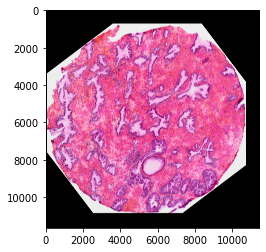

In [56]:
plt.imshow(warped_image.final_transform.registered_image)

In [57]:
warped_image.final_transform.registered_image.shape

(11646, 11437, 3)